# Dự đoán khả năng sống sót của hành khách trên tàu Titanic (Classification)

## Import required library

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Data Collection

In [131]:
!unzip "/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Titanic.zip" -d "/content/Dataset/"

Archive:  /content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Titanic.zip
  inflating: /content/Dataset/gender_submission.csv  
  inflating: /content/Dataset/test.csv  
  inflating: /content/Dataset/train.csv  


In [ ]:
train_df = pd.read_csv("/content/Dataset/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [401]:
train_df = pd.read_csv("/content/Dataset/train.csv", index_col= "PassengerId")
test_df = pd.read_csv("/content/Dataset/test.csv", index_col= "PassengerId")

## Explore Data Analysis (EDA)

### Mô tả từng thuộc tính trong dữ liệu Titanic

---
`survived`: Khả năng sống sót của hành khách trên tàu `0` là die `1` là alive\
`pclass`: Hạng vé lên tàu `1` là Cao cấp, `2` là thương gia, `3` là vé thường\
`Name`: Tên hành khách lên chuyến tàu Titanic\
`Sex`: Giới tính của từng người `male` là nam, `female` là nữ\
`Age`: Độ tuổi của từng người (Dữ liệu số liên tục)\
`SibSp`: Số lượng anh chị em, vợ/ chồng đi chung\
`Parch`: Số lượng hành khách là Cha mẹ / Con cái đi cùng\
`Ticket`: Mã vé tàu\
`Fare`: Giá vé (Dữ liệu số rời rạc)\
`Cabin`: Mã toa tàu của từng hành khách trên tàu\
`Embarked`: Cảng đón hành khách `S` là `Southampton (Anh)`, `C` là `Cherbourg (Pháp)`, `Q` là `Queenstown (Ireland)`

In [402]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


`=>` 891 mẫu với 11 thuộc tính

In [403]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


`=>` 418 mẫu với 10 thuộc tính loại `Survived`

In [404]:
train_df.shape, test_df.shape

((891, 11), (418, 10))

###Dữ liệu `Category` (Nominal - Ordinal):
* `Name`
* `Sex`
* `Embarked`
* `Pclass` (ordinal)
* `Survived`
---
###Dữ liệu `Numeric` (Continuouns - Discrete - TimeSeries):
* `Age` (continuouns)
* `Fare`
* `SibSp`
* `Parch`
---
###Dữ liệu `Mix types`:
* `Ticket`
* `Cabin`

In [405]:
train_df = train_df.drop(["Ticket", "Cabin"], axis= 1)
test_df = test_df.drop(["Ticket", "Cabin"], axis= 1)

In [406]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<ipython-input-407-6ccb8e0d05fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


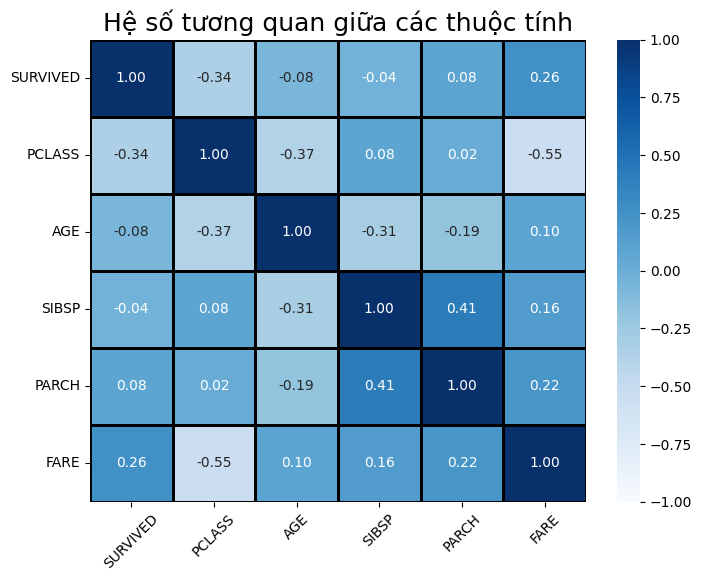

In [407]:
corr = train_df.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data= corr,
            vmin=-1, vmax=1,
            annot=True, fmt=".2f", cmap="Blues",
            linecolor="black", linewidths=1)

ysticks = [feature.upper() for feature in corr.index]
xsticks = [feature.upper() for feature in corr.columns]

ax.set_yticklabels(ysticks, rotation=0); ax.set_xticklabels(xsticks, rotation=45)

_ = ax.set_title("Hệ số tương quan giữa các thuộc tính", fontsize=18)

In [408]:
features = ["Survived", "Sex", "Embarked", "Pclass"]
def convert_types(df, features):
  for feature in features:
    df[feature] = df[feature].astype("category")

convert_types(train_df, features)

In [409]:
train_df.describe(include=['category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,889
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,644


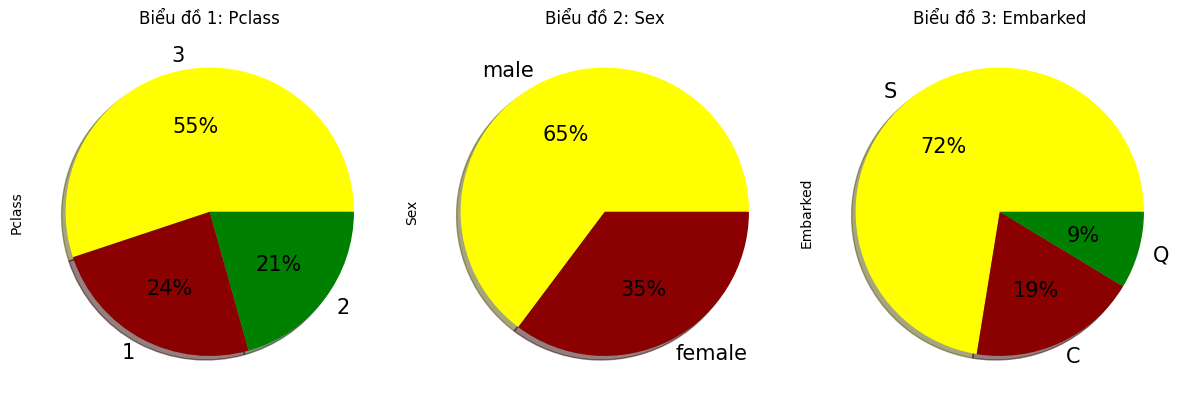

In [410]:
custom_colors = ["yellow", "darkred", "green"]
cols = ['Pclass', 'Sex', 'Embarked']
n_rows = 1
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for i in range(len(cols)):
    ax_i = ax[i] if n_cols > 1 else ax
    train_df[cols[i]].value_counts().plot(kind="pie", autopct="%.0f%%", fontsize=15, shadow=True, colors=custom_colors, ax=ax_i)
    ax_i.set_title(f"Biểu đồ {i+1}: {cols[i]}")

plt.tight_layout()
plt.show()

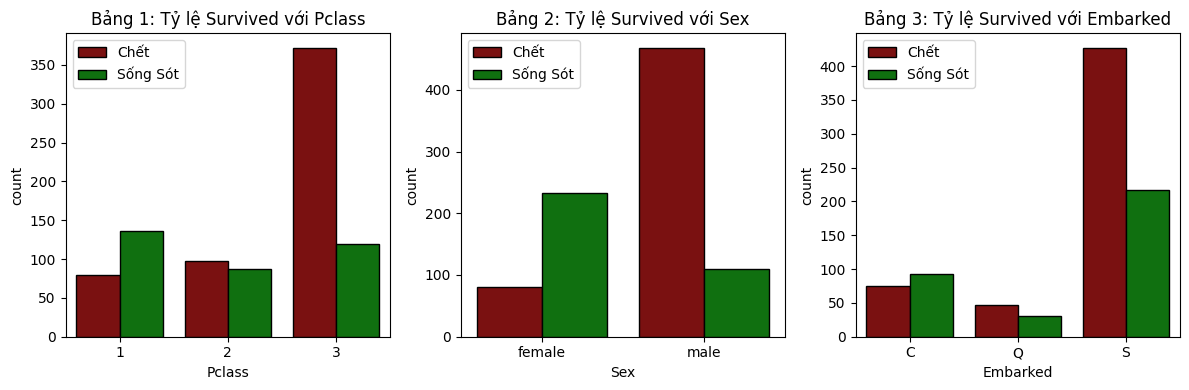

In [411]:
custom_colors = ["darkred", "green"]
cols = ['Pclass', 'Sex', 'Embarked']
n_rows = 1
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for i in range(len(cols)):
    ax_i = ax[i] if n_cols > 1 else ax
    sns.countplot(data=train_df, x=cols[i], hue='Survived', palette=custom_colors, ax=ax_i, edgecolor="black")
    ax_i.set_title(f"Bảng {i+1}: Tỷ lệ Survived với {cols[i]}")
    ax_i.legend(labels=['Chết', 'Sống Sót'])

plt.tight_layout()
plt.show()

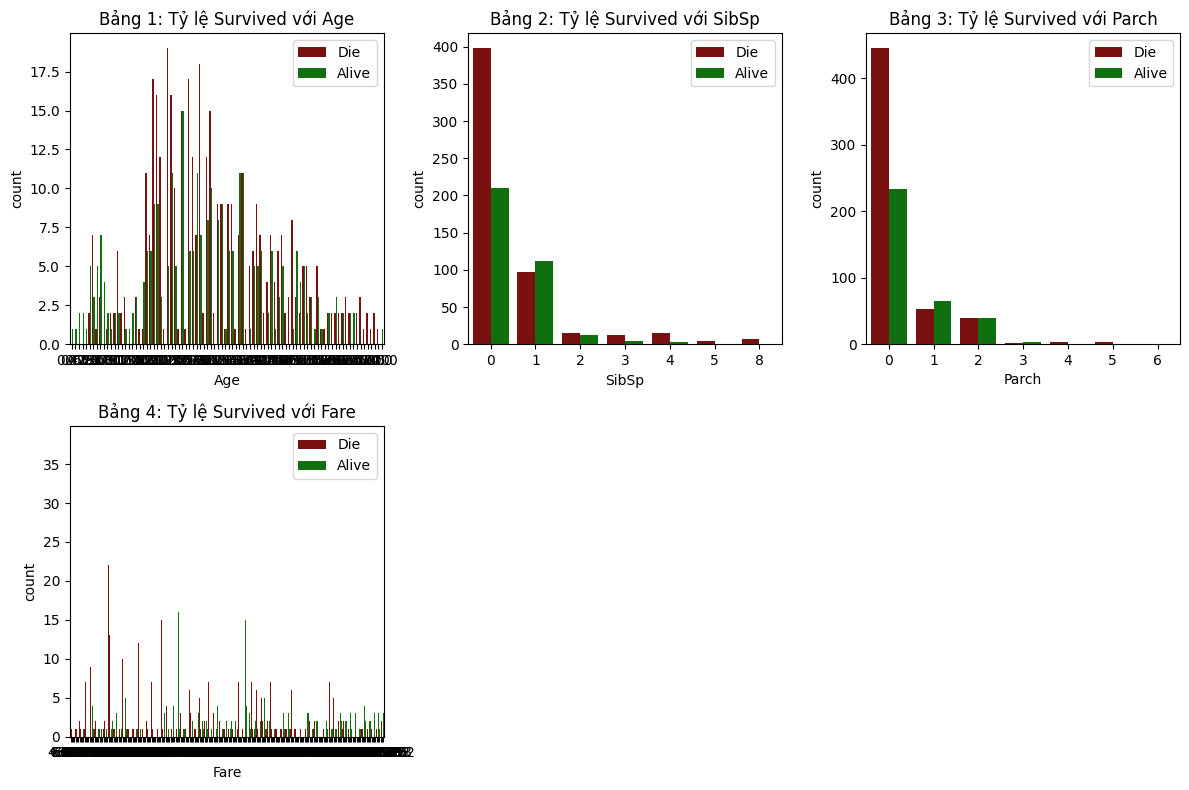

In [412]:
custom_colors = ["darkred", "green"]
cols = ['Age', 'SibSp', 'Parch', 'Fare']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for row in range(0, n_rows):
  for col in range(0, n_cols):
    i = row*n_cols + col
    if i < len(cols):
      ax_i = ax[row, col]
      sns.countplot(data = train_df, x = cols[i], hue='Survived', palette=custom_colors, ax= ax_i)
      ax_i.set_title(f"Bảng {i+1}: Tỷ lệ Survived với {cols[i]}")
      ax_i.legend(labels=['Die', 'Alive'])

ax.flat[-1].set_visible(False)
ax.flat[-2].set_visible(False)
plt.tight_layout()
plt.show()

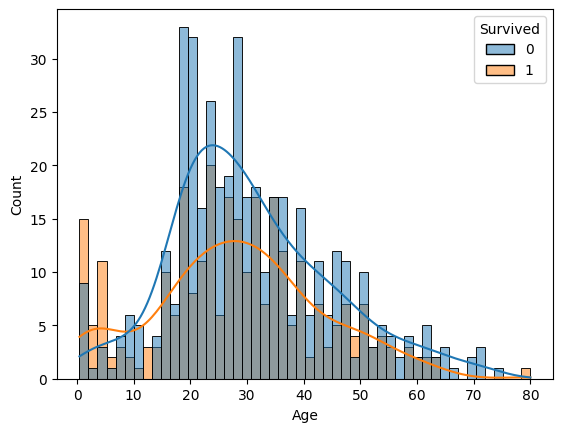

In [413]:
_= sns.histplot(data=train_df, x='Age', hue='Survived', bins = 50, kde=True)

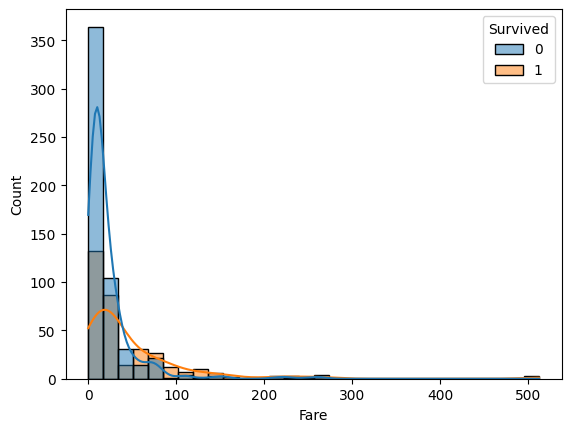

In [414]:
_= sns.histplot(data=train_df, x='Fare', hue='Survived', bins = 30, kde=True)

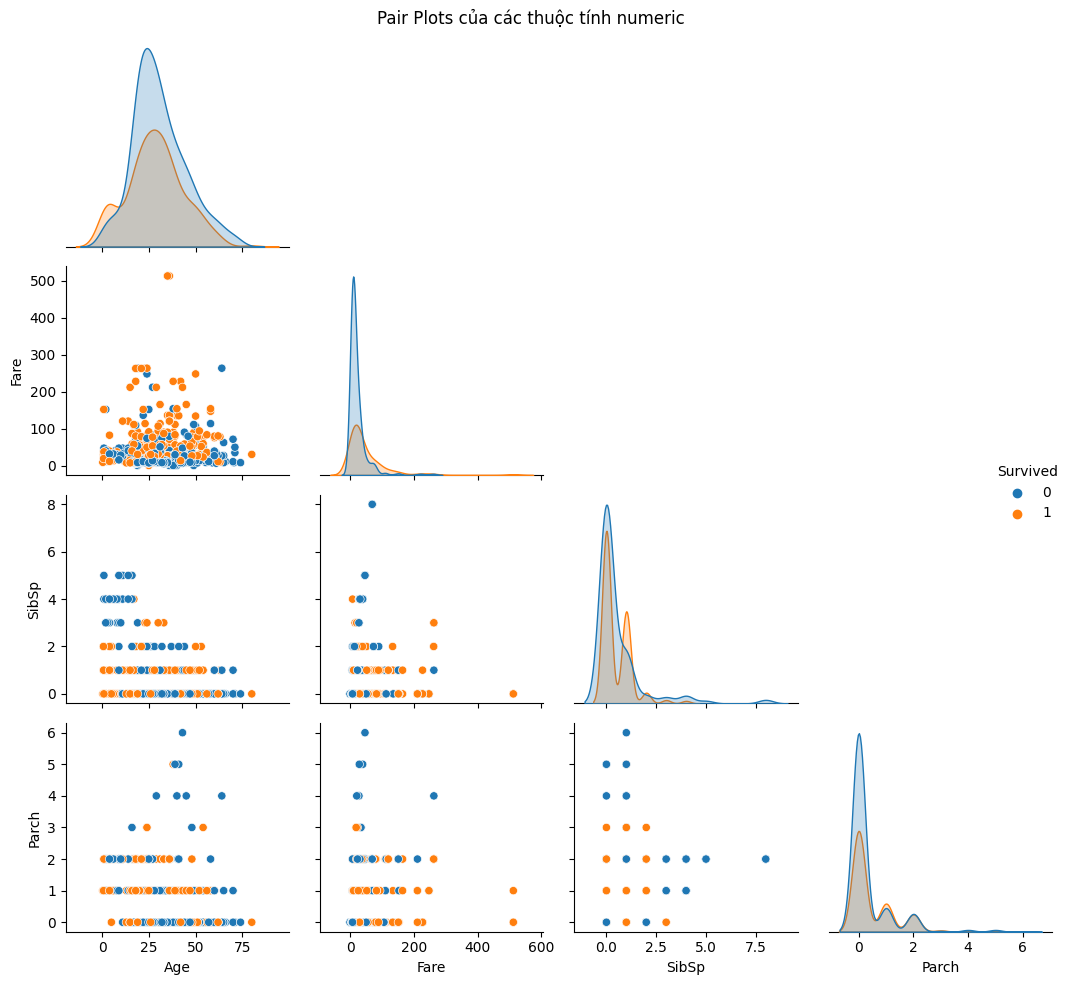

In [415]:
sns.pairplot(data= train_df, vars= ["Age", "Fare", "SibSp", "Parch"], hue= "Survived", corner= True)
plt.suptitle("Pair Plots của các thuộc tính numeric")
plt.tight_layout()
plt.show()

<ipython-input-416-6ccb8e0d05fd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train_df.corr()


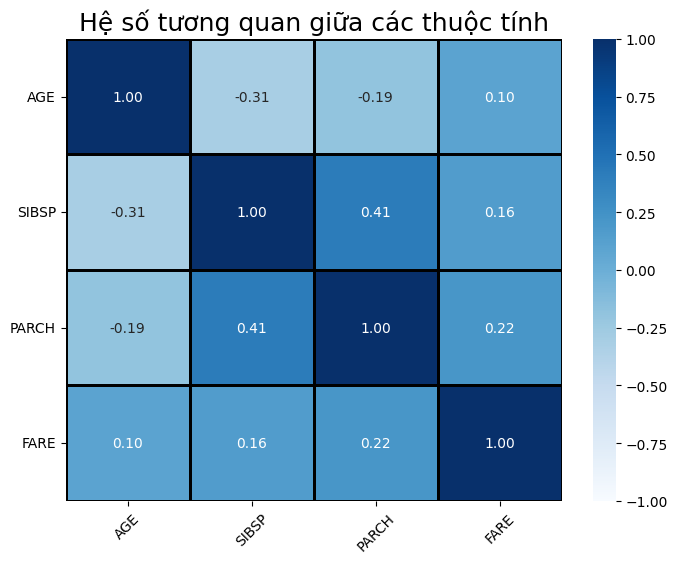

In [416]:
corr = train_df.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data= corr,
            vmin=-1, vmax=1,
            annot=True, fmt=".2f", cmap="Blues",
            linecolor="black", linewidths=1)

ysticks = [feature.upper() for feature in corr.index]
xsticks = [feature.upper() for feature in corr.columns]

ax.set_yticklabels(ysticks, rotation=0); ax.set_xticklabels(xsticks, rotation=45)

_ = ax.set_title("Hệ số tương quan giữa các thuộc tính", fontsize=18)

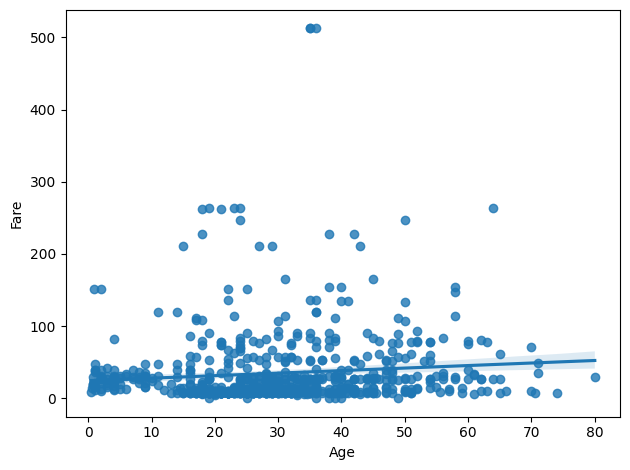

In [417]:
sns.regplot(data= train_df, x='Age', y= 'Fare')
plt.tight_layout()
plt.show()

## Data Pre-processing

In [418]:
# Dependent Variables (Biến phụ thuộc)
numeric_features = ['Age', 'Fare',  'SibSp', 'Parch']
category_features = ['Pclass', 'Sex', 'Embarked']
other_features = ['Name']
# Independent Variables (Biến độc lập)
label_feature = ['Survived']
features_cols = numeric_features + category_features + other_features
print(features_cols)

['Age', 'Fare', 'SibSp', 'Parch', 'Pclass', 'Sex', 'Embarked', 'Name']


### Missing Data

In [419]:
def Show_missing(df, features):
  n_rows = train_df.shape[0]
  missing_data = False

  for col in features:
    missing_values = df[col].isnull().sum()
    missing_percents = (missing_values/len(df)*100)
    if missing_values > 0:
      missing_data = True
      print(f"Cột {col} có {missing_percents:.2f}% giá trị bị thiếu. ({missing_values} mẫu)")

  if not missing_data:
    print("Dữ liệu đầy đủ")

print("TẬP TRAIN")
Show_missing(train_df, features_cols)
print("=================================================")
print("TẬP TEST")
Show_missing(test_df, features_cols)

TẬP TRAIN
Cột Age có 19.87% giá trị bị thiếu. (177 mẫu)
Cột Embarked có 0.22% giá trị bị thiếu. (2 mẫu)
TẬP TEST
Cột Age có 20.57% giá trị bị thiếu. (86 mẫu)
Cột Fare có 0.24% giá trị bị thiếu. (1 mẫu)


In [420]:
def missing_values_plot(df):
    plt.figure(figsize=(10, 6))
    sns.displot(
          data= df.isna().melt(value_name="dữ liệu thiếu"),
          y= "variable",
          hue= "dữ liệu thiếu",
          multiple= "fill",
          aspect= 1.25
    )
    plt.show()

<Figure size 1000x600 with 0 Axes>

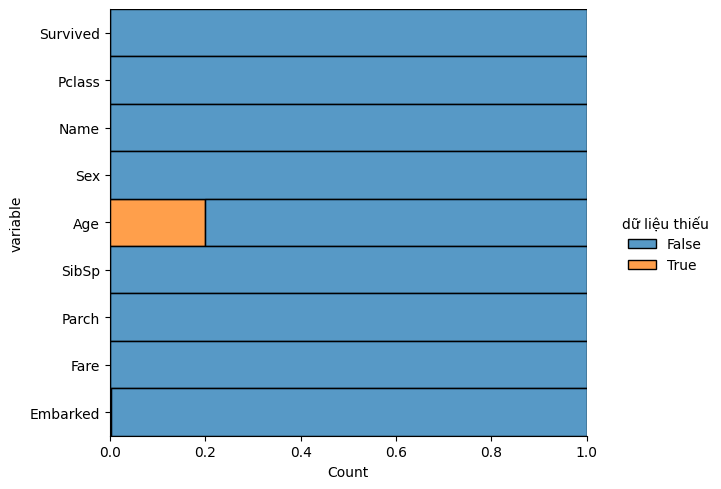

In [421]:
missing_values_plot(train_df)

In [422]:
import missingno as msno

<Axes: >

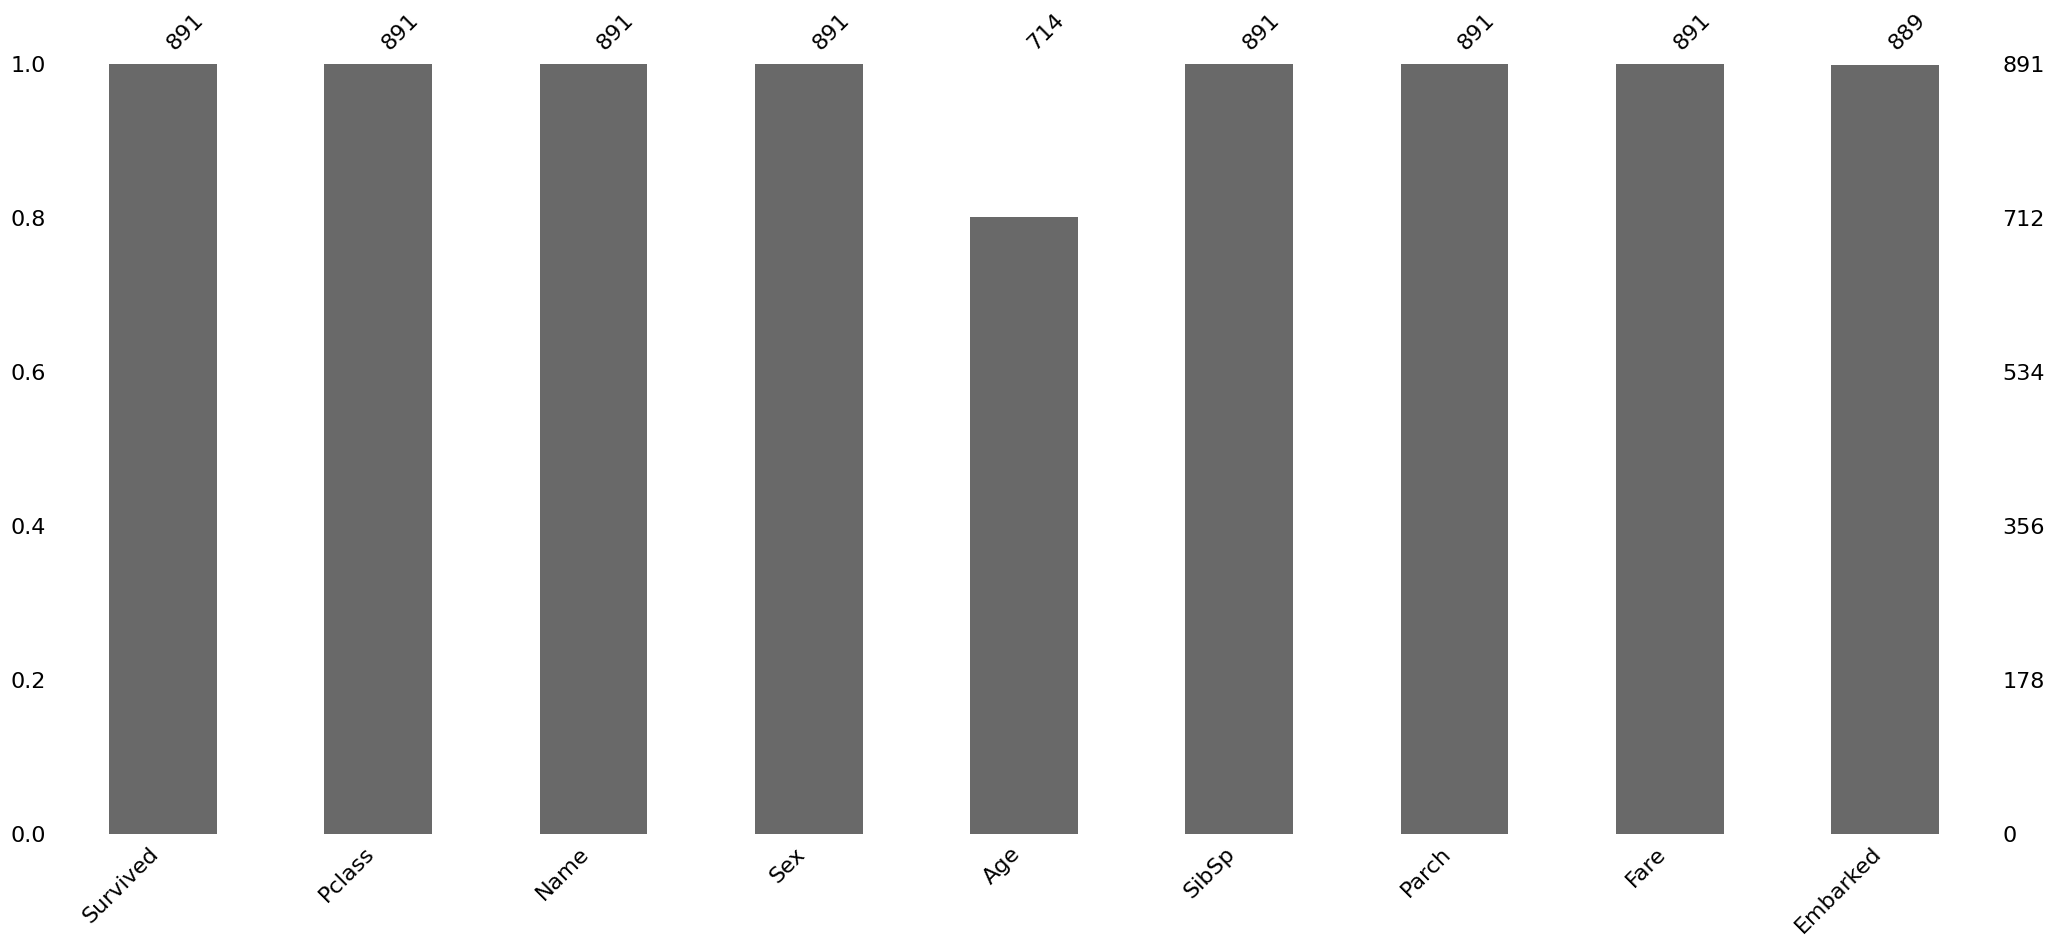

In [423]:
msno.bar(train_df)

In [424]:
age_by_Sex_and_Pclass = train_df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
age_by_Sex_and_Pclass = pd.DataFrame(age_by_Sex_and_Pclass)
age_by_Sex_and_Pclass

Age
Sex    Pclass      
female 1       35.0
       2       28.0
       3       21.5
male   1       40.0
       2       30.0
       3       25.0

In [425]:
train_df['Age'] = train_df.groupby(['Sex', 'Pclass'], group_keys= False)['Age'].apply(lambda x: x.fillna(x.median()))

In [426]:
Show_missing(train_df, features_cols)

Cột Embarked có 0.22% giá trị bị thiếu. (2 mẫu)


In [427]:
train_df[train_df.isnull().any(axis=1)]
# 2 cô này đều lên cảng ở Southampton

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [428]:
from sklearn.impute import SimpleImputer

In [429]:
imputer = SimpleImputer(missing_values= np.nan, strategy='most_frequent')
train_df['Embarked'] = imputer.fit_transform(train_df[['Embarked']])

In [430]:
Show_missing(train_df, features_cols)

Dữ liệu đầy đủ


###Outliers

<Figure size 800x500 with 0 Axes>

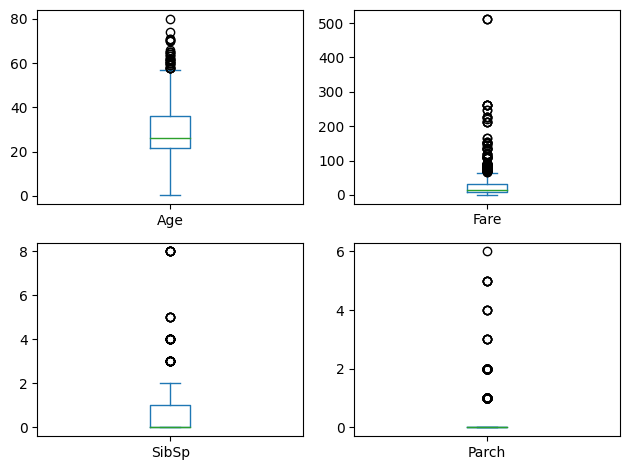

In [431]:
plt.figure(figsize=(8, 5))
plt.subplots(2, 2)

plt.subplot(2, 2, 1)
train_df.Age.plot.box()
plt.subplot(2, 2, 2)
train_df.Fare.plot.box()
plt.subplot(2, 2, 3)
train_df.SibSp.plot.box()
plt.subplot(2, 2, 4)
train_df.Parch.plot.box()
plt.tight_layout()
plt.show()

<Axes: xlabel='variable', ylabel='value'>

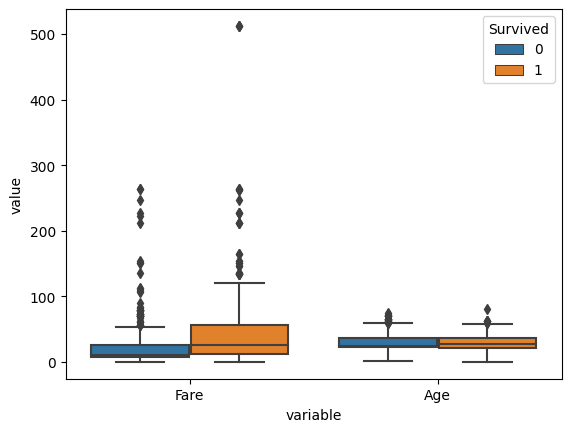

In [432]:
melted_df = pd.melt(train_df, value_vars=['Fare', 'Age'], id_vars= 'Survived')
sns.boxplot(x='variable', y='value', data=melted_df, hue= 'Survived')

In [433]:
print('Độ lệch của Age: ',train_df['Age'].skew())
print('Độ lệch của Fare: ',train_df['Fare'].skew())
print('Độ lệch của SibSp', train_df['SibSp'].skew())
print('Độ lệch của Parch', train_df['Parch'].skew())

Độ lệch của Age:  0.5340834483875482
Độ lệch của Fare:  4.787316519674893
Độ lệch của SibSp 3.6953517271630565
Độ lệch của Parch 2.7491170471010933


<Axes: xlabel='variable', ylabel='value'>

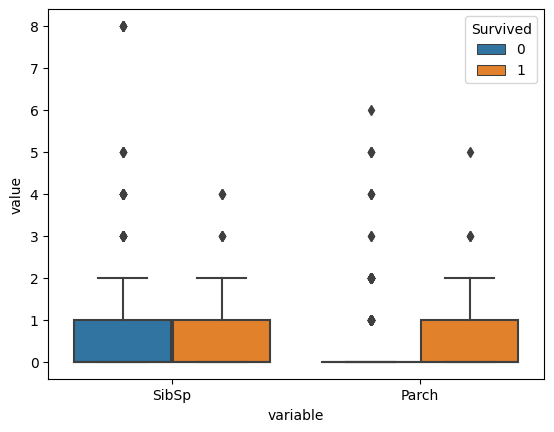

In [434]:
melted_df = pd.melt(train_df, value_vars= ['SibSp', 'Parch'], id_vars= 'Survived')
sns.boxplot(x='variable', y='value', data= melted_df, hue= 'Survived')

In [435]:
def Zscore_outlier(df, nguong):
    out=[]
    m = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i-m)/sd
        if np.abs(z) > nguong:
            out.append(i)
    print("Outliers: ",out)

def check_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    min_limit = Q1 - 1.5 * IQR
    max_limit = Q3 + 1.5 * IQR
    outliers = data[(data[column] < min_limit) | (data[column] > max_limit)]
    return outliers

Age, Fare

In [436]:
check_outliers_iqr(train_df, 'Age')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S
34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,10.5000,S
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,61.9792,C
95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,7.2500,S
97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,34.6542,C
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,7.7500,Q
171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,33.5000,S
196,1,1,"Lurette, Miss. Elise",female,58.0,0,0,146.5208,C
233,0,2,"Sjostedt, Mr. Ernst Adolf",male,59.0,0,0,13.5000,S


In [437]:
len(check_outliers_iqr(train_df, 'Age'))

33

In [438]:
check_outliers_iqr(train_df, 'Fare')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,263.0000,S
32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,35.0,1,0,146.5208,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,82.1708,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,76.7292,C
...,...,...,...,...,...,...,...,...,...
847,0,3,"Sage, Mr. Douglas Bullen",male,25.0,8,2,69.5500,S
850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,35.0,1,0,89.1042,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,164.8667,S


In [439]:
q1 = train_df["Age"].quantile(0.25)
q3 = train_df["Age"].quantile(0.75)
IQR = q3-q1
print(IQR)

limit = 1.5
max_limit = q3 + (limit * IQR)
print(max_limit)
min_limit = q1 - (limit * IQR)
print(min_limit)

14.5
57.75
-0.25


In [440]:
train_df.loc[train_df['Age']>=57,'Age'] = 57

<Axes: xlabel='Age'>

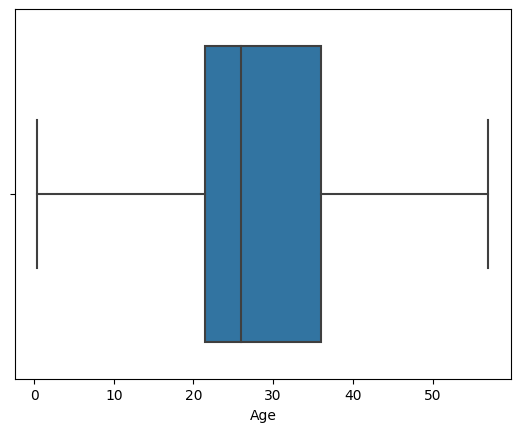

In [441]:
sns.boxplot(x= 'Age', data= train_df)

In [442]:
q1 = train_df["Fare"].quantile(0.25)
q3 = train_df["Fare"].quantile(0.75)
IQR = q3-q1
print(IQR)

limit = 1.5
max_limit = q3 + (limit * IQR)
print(max_limit)
min_limit = q1 - (limit * IQR)
print(min_limit)

23.0896
65.6344
-26.724


In [443]:
train_df.loc[train_df['Fare']>=65,'Fare'] = 64

<Axes: xlabel='Fare'>

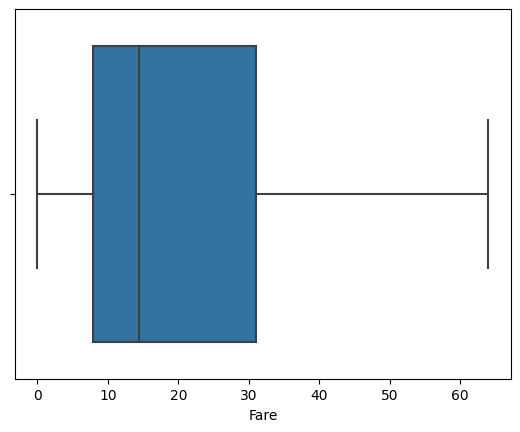

In [444]:
sns.boxplot(x= 'Fare', data= train_df)

In [445]:
check_outliers_iqr(train_df, 'Fare'), check_outliers_iqr(train_df, 'Age')

(Empty DataFrame
 Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
 Index: [],
 Empty DataFrame
 Columns: [Survived, Pclass, Name, Sex, Age, SibSp, Parch, Fare, Embarked]
 Index: [])

In [446]:
print('Độ lệch của Age: ',train_df['Age'].skew())
print('Độ lệch của Fare: ',train_df['Fare'].skew())
print('Độ lệch của SibSp', train_df['SibSp'].skew())
print('Độ lệch của Parch', train_df['Parch'].skew())

Độ lệch của Age:  0.26490356037423407
Độ lệch của Fare:  1.0527503143355768
Độ lệch của SibSp 3.6953517271630565
Độ lệch của Parch 2.7491170471010933


<Axes: xlabel='variable', ylabel='value'>

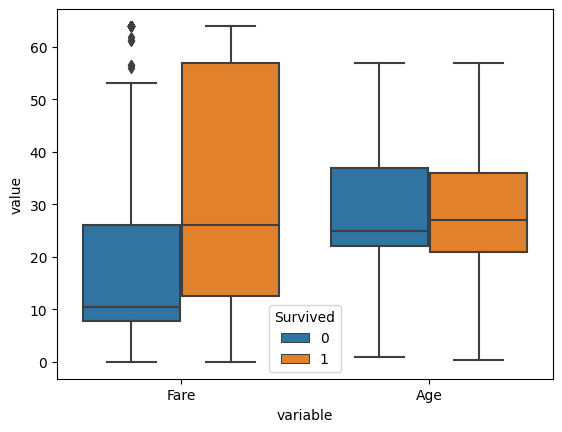

In [447]:
melted_df = pd.melt(train_df, value_vars=['Fare', 'Age'], id_vars= 'Survived')
sns.boxplot(x='variable', y='value', data=melted_df, hue= 'Survived')

In [448]:
fare_survived_0 = melted_df[(melted_df['Survived'] == 0) & (melted_df['variable'] == 'Fare')]['value']
fare_survived_0
upper_threshold = fare_survived_0.quantile(0.915)
lower_threshold = fare_survived_0.quantile(0.085)
print(upper_threshold, lower_threshold)

52.0 7.225


In [449]:
0.915 + 0.085

1.0

In [450]:
len(fare_survived_0[(fare_survived_0 > upper_threshold) | (fare_survived_0 < lower_threshold)])

85

In [451]:
upper_threshold = train_df.loc[train_df['Survived'] == 0, 'Fare'].quantile(0.915)
lower_threshold = train_df.loc[train_df['Survived'] == 0, 'Fare'].quantile(0.085)
print(upper_threshold, lower_threshold)

52.0 7.225


In [452]:
train_df.loc[(train_df['Survived'] == 0) & (train_df['Fare'] < lower_threshold), 'Fare'] = 8
train_df.loc[(train_df['Survived'] == 0) & (train_df['Fare'] > upper_threshold), 'Fare'] = 52

<Axes: xlabel='variable', ylabel='value'>

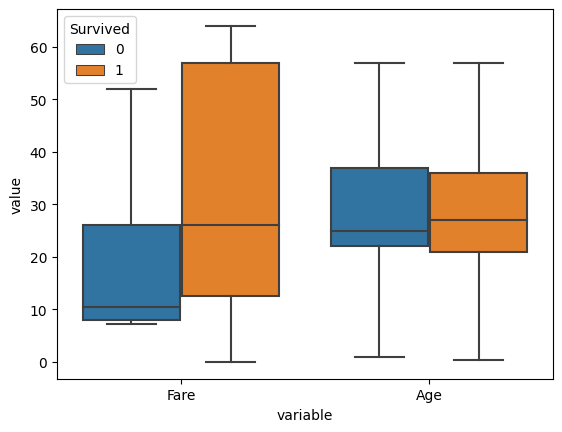

In [453]:
melted_df = pd.melt(train_df, value_vars=['Fare', 'Age'], id_vars= 'Survived')
sns.boxplot(x='variable', y='value', data=melted_df, hue= 'Survived')

In [454]:
print('Độ lệch của Age: ',train_df['Age'].skew())
print('Độ lệch của Fare: ',train_df['Fare'].skew())

Độ lệch của Age:  0.26490356037423407
Độ lệch của Fare:  1.0554078793011281


SibSp, Parch

In [455]:
check_outliers_iqr(train_df, 'SibSp')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S
17,0,3,"Rice, Master. Eugene",male,2.0,4,1,29.1250,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,21.0750,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,52.0000,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,39.6875,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,46.9000,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,27.9000,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,7.9250,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,46.9000,S


In [456]:
train_df['Family'] = train_df['SibSp'].astype('int') + train_df['Parch'].astype('int') + 1

<Axes: xlabel='Family', ylabel='count'>

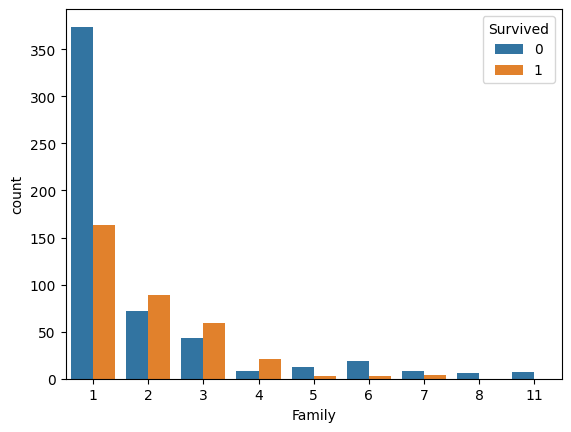

In [457]:
sns.countplot(data= train_df, x= 'Family', hue= 'Survived')

In [458]:
train_df['Family_Cate']= pd.cut(train_df['Family'], bins= [0, 1, 3, 11], labels = ['Single', 'Multiplayer', 'SuperMultiplayer'])

<Axes: xlabel='Family_Cate', ylabel='count'>

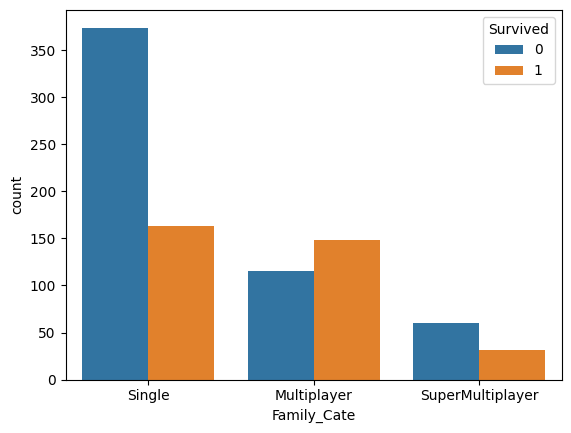

In [459]:
sns.countplot(data= train_df, x= 'Family_Cate', hue= 'Survived')

In [460]:
train_df[['SibSp', 'Parch' , 'Family', 'Family_Cate']].head()

,SibSp,Parch,Family,Family_Cate
PassengerId,,,,
1,1,0,2,Multiplayer
2,1,0,2,Multiplayer
3,0,0,1,Single
4,1,0,2,Multiplayer
5,0,0,1,Single


Name

In [461]:
train_df['Name']

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [462]:
import re

In [463]:
def extract_title(name):
  p = re.compile(r",(.+)\.")
  return p.search(name).groups(1)[0].strip()

In [464]:
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

In [465]:
train_df['Title'].value_counts()

Mr                          517
Miss                        182
Mrs                         124
Master                       40
Dr                            7
Rev                           6
Col                           2
Mlle                          2
Major                         2
Ms                            1
Mrs. Martin (Elizabeth L      1
Lady                          1
Sir                           1
Mme                           1
Don                           1
Capt                          1
the Countess                  1
Jonkheer                      1
Name: Title, dtype: int64

In [466]:
train_df[train_df['Name'].str.contains('Mrs. Martin')]['Name']

PassengerId
514    Rothschild, Mrs. Martin (Elizabeth L. Barrett)
Name: Name, dtype: object

In [467]:
def extract_title(name):
  p = re.compile(r", (\w+)\.")
  if p.search(name) is None:
    print(name)
  # return p.search(name).groups(1)[0].strip()

In [468]:
train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)


In [469]:
def extract_title(name):
  p = re.compile(r",([\w\s]+).")
  return p.search(name).groups(1)[0].strip()

train_df['Title'] = train_df['Name'].apply(lambda name: extract_title(name))

Text(0.5, 1.0, 'Đại từ nhân xưng')

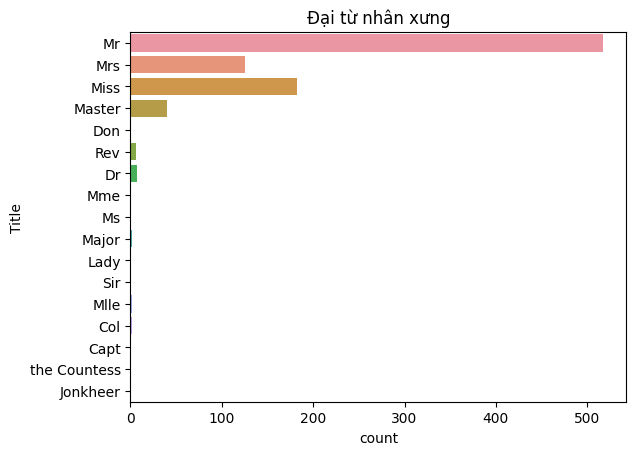

In [470]:
sns.countplot(data= train_df, y='Title')
plt.title("Đại từ nhân xưng")

In [471]:
def group_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

train_df['Title'] = train_df['Title'].apply(lambda title: group_title(title))

Text(0.5, 1.0, 'Đại từ nhân xưng')

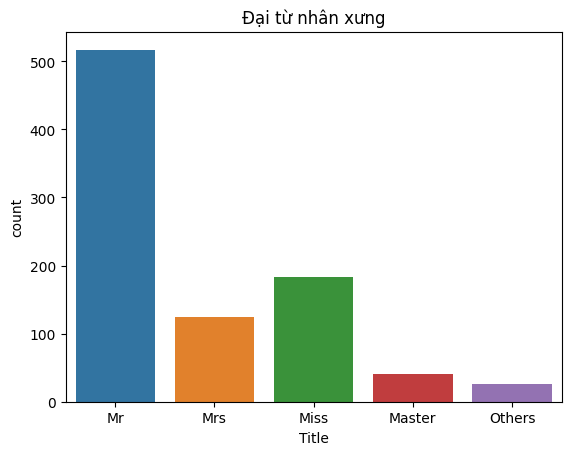

In [472]:
sns.countplot(data= train_df, x='Title')
plt.title("Đại từ nhân xưng")

Text(0.5, 1.0, 'Đại từ nhân xưng')

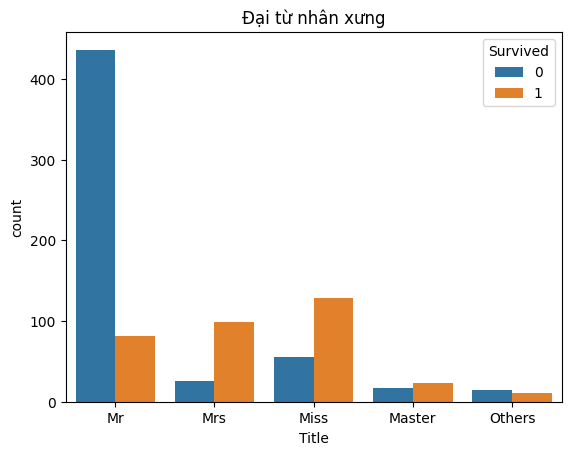

In [473]:
sns.countplot(data= train_df, x='Title', hue= 'Survived')
plt.title("Đại từ nhân xưng")

### Data Encoding

In [306]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Cate,Title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.250,S,2,Multiplayer,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,64.000,C,2,Multiplayer,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.925,S,1,Single,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.100,S,2,Multiplayer,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.050,S,1,Single,Mr


In [307]:
from sklearn.preprocessing import LabelEncoder

In [308]:
lab_Sex = LabelEncoder()
lab_Sex.fit(['female', 'male'])
train_df['Sex'] = lab_Sex.transform(train_df['Sex'])

In [309]:
Cate_features = ['Embarked', 'Family_Cate', 'Title']
train_df_cate = train_df[Cate_features]
encoded_features = []

for feature in Cate_features:
  encoded_feature = pd.get_dummies(train_df[feature], prefix= feature)
  encoded_features.append(encoded_feature)

Cate_features_encoded = pd.concat([train_df_cate] + encoded_features, axis=1)

In [310]:
Cate_features_encoded = Cate_features_encoded.drop(['Embarked', 'Family_Cate', 'Title'], axis= 1)

### Data Normalization (Transformation)

In [311]:
from sklearn.preprocessing import StandardScaler

In [312]:
age_scaler = StandardScaler()
train_df['Age_scaled']= age_scaler.fit_transform(train_df[['Age']])

In [313]:
fare_scaler = StandardScaler()
train_df['Fare_scaled']= fare_scaler.fit_transform(train_df[['Fare']])

In [314]:
train_df[['Age', 'Fare', 'Age_scaled', 'Fare_scaled']].head()

,Age,Fare,Age_scaled,Fare_scaled
PassengerId,,,,
1,22.0,7.250,-0.542222,-0.856233
2,38.0,64.000,0.721317,2.143615
3,26.0,7.925,-0.226337,-0.820552
4,35.0,53.100,0.484403,1.567432
5,35.0,8.050,0.484403,-0.813945


In [ ]:
train_df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Family_Cate,Title,Age_scaled,Fare_scaled
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.25,S,2,Multiplayer,Mr,-0.542222,-0.856233


In [ ]:
selection_features = ['Age_scaled', 'Fare_scaled', 'Pclass', 'Sex', 'Survived']
data_preprocessed = train_df[selection_features]

In [ ]:
features = ['Pclass', 'Survived']
for feature in features:
  data_preprocessed[feature] = data_preprocessed[feature].astype("int64")

<ipython-input-835-baa5828f04c3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_preprocessed[feature] = data_preprocessed[feature].astype("int64")


In [ ]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age_scaled   891 non-null    float64
 1   Fare_scaled  891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Survived     891 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 74.1 KB


In [ ]:
best_data = pd.concat([Cate_features_encoded, data_preprocessed], axis= 1)
best_data.head()

,Embarked_C,Embarked_Q,Embarked_S,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Age_scaled,Fare_scaled,Pclass,Sex,Survived
PassengerId,,,,,,,,,,,,,,,,
1,0,0,1,0,1,0,0,0,1,0,0,-0.542222,-0.856233,3,1,0
2,1,0,0,0,1,0,0,0,0,1,0,0.721317,2.143615,1,0,1
3,0,0,1,1,0,0,0,1,0,0,0,-0.226337,-0.820552,3,0,1
4,0,0,1,0,1,0,0,0,0,1,0,0.484403,1.567432,1,0,1
5,0,0,1,1,0,0,0,0,1,0,0,0.484403,-0.813945,3,1,0


In [ ]:
best_data.to_csv("/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Data/best_data.csv")

In [5]:
best_data = pd.read_csv('/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Data/best_data.csv', index_col= ['PassengerId'])

In [31]:
best_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Embarked_C                    891 non-null    int64  
 1   Embarked_Q                    891 non-null    int64  
 2   Embarked_S                    891 non-null    int64  
 3   Family_Cate_Single            891 non-null    int64  
 4   Family_Cate_Multiplayer       891 non-null    int64  
 5   Family_Cate_SuperMultiplayer  891 non-null    int64  
 6   Title_Master                  891 non-null    int64  
 7   Title_Miss                    891 non-null    int64  
 8   Title_Mr                      891 non-null    int64  
 9   Title_Mrs                     891 non-null    int64  
 10  Title_Others                  891 non-null    int64  
 11  Age_scaled                    891 non-null    float64
 12  Fare_scaled                   891 non-null    float64
 13  Pclas

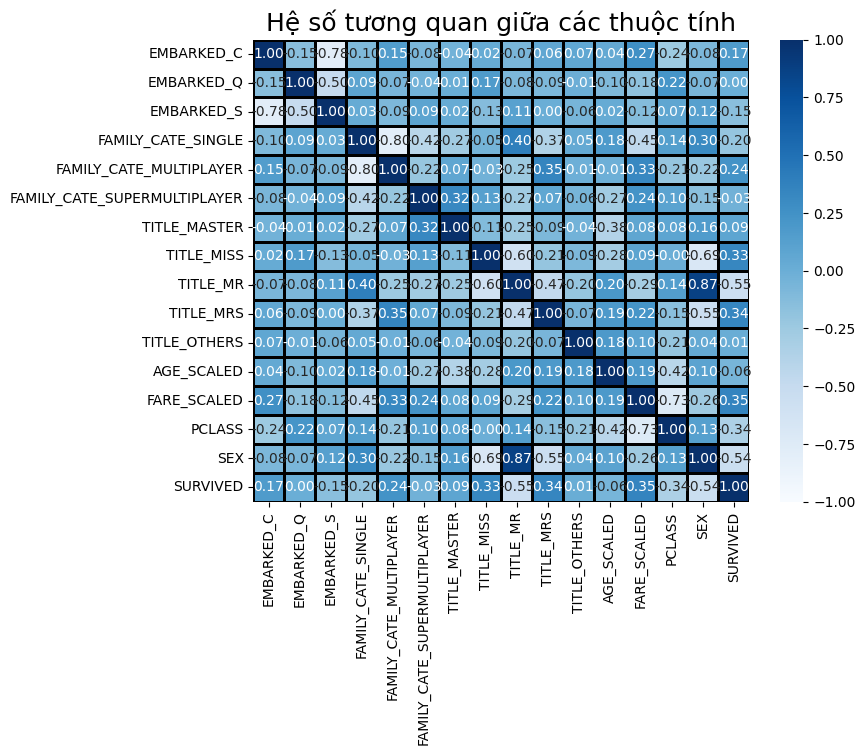

In [6]:
corr = best_data.corr()

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data= corr,
            vmin=-1, vmax=1,
            annot=True, fmt=".2f", cmap="Blues",
            linecolor="black", linewidths=1)

ysticks = [feature.upper() for feature in corr.index]
xsticks = [feature.upper() for feature in corr.columns]

ax.set_yticklabels(ysticks, rotation=0); ax.set_xticklabels(xsticks, rotation=90)

_ = ax.set_title("Hệ số tương quan giữa các thuộc tính", fontsize=18)

### Imbalanced Data


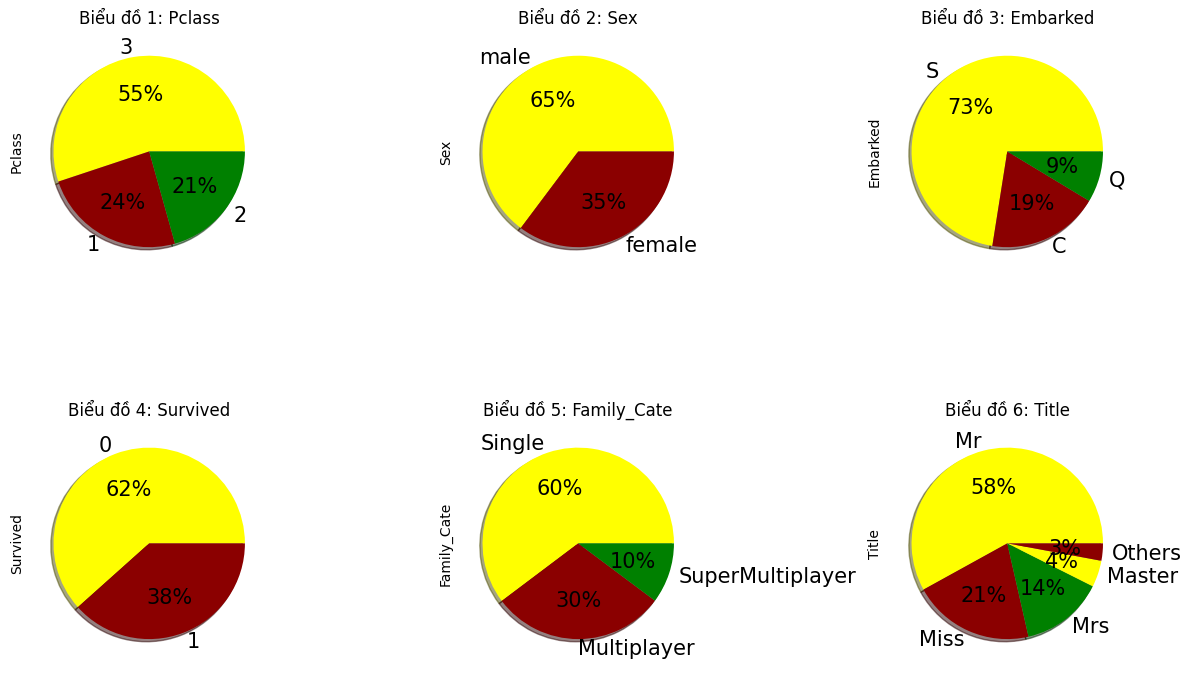

In [ ]:
custom_colors = ["yellow", "darkred", "green"]
cols = ['Pclass', 'Sex', 'Embarked', 'Survived', 'Family_Cate', 'Title']
n_rows = 2
n_cols = 3

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*4))

for row in range(0, n_rows):
  for col in range(0, n_cols):
    i = row*n_cols + col
    if i < len(cols):
      ax_i = ax[row, col]
      train_df[cols[i]].value_counts().plot(kind="pie", autopct="%.0f%%", fontsize=15, shadow=True, colors=custom_colors, ax=ax_i)
      ax_i.set_title(f"Biểu đồ {i+1}: {cols[i]}")

plt.tight_layout()
plt.show()

In [7]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

In [8]:
X = best_data.iloc[:, :-1] # Dependent Variables
y = best_data.iloc[:, -1] # Independent Variables

In [9]:
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [10]:
smote = SMOTE()
X_Over, y_Over = smote.fit_resample(X, y)

undersampling = NearMiss()
X_Under, y_Under = undersampling.fit_resample(X, y)

print(y_Over.value_counts())
print(len(X_Over), len(y_Over))
print("=======================")
print(y_Under.value_counts())
print(len(X_Under), len(y_Under))

0    549
1    549
Name: Survived, dtype: int64
1098 1098
0    342
1    342
Name: Survived, dtype: int64
684 684


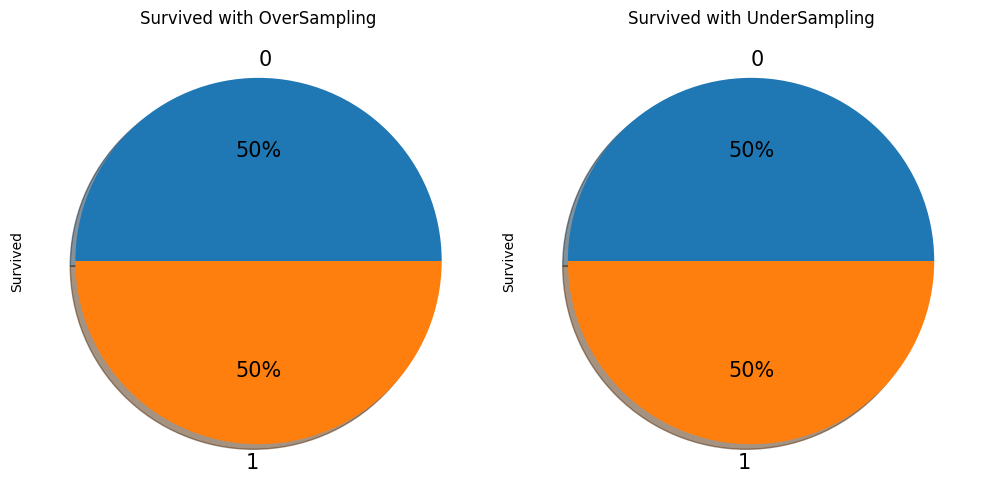

In [25]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

y_Over.value_counts().plot(kind="pie", autopct="%.0f%%", fontsize=15, shadow=True, ax=ax1)
ax1.set_title("Survived with OverSampling")
y_Under.value_counts().plot(kind="pie", autopct="%.0f%%", fontsize=15, shadow=True, ax=ax2)
ax2.set_title("Survived with UnderSampling")

plt.tight_layout()
plt.show()

## Data Preparation

In [76]:
from sklearn.model_selection import cross_val_score, train_test_split

##Modeling

In [28]:
# !pip install xgboost

In [108]:
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [109]:
seed = 500

model = [
    LinearSVC(random_state= seed),
    SVC(random_state= seed),
    KNeighborsClassifier(),
    LogisticRegression(),
    DecisionTreeClassifier(random_state= seed),
    RandomForestClassifier(random_state= seed),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    XGBClassifier()
]

In [32]:
from sklearn.model_selection import KFold, GroupKFold

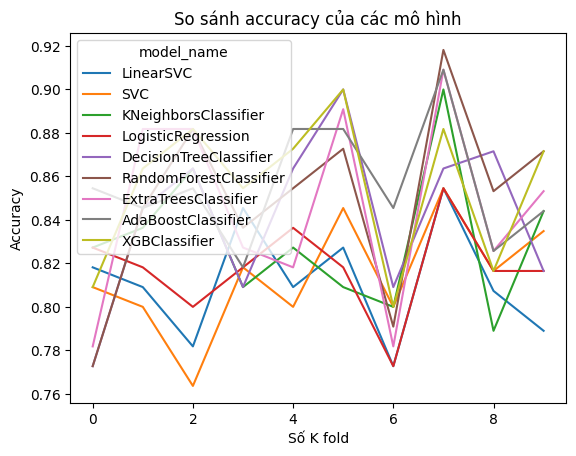

In [110]:
def generate_baseline_model(models, X, y, metrics, cv= 5, plot= False):
  kFold = KFold(cv, shuffle= True, random_state= seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X_Over, y_Over, scoring= metrics, cv= kFold)
    for fold_idx, score in enumerate(scores):
      entries.append((model_name, fold_idx, score))

  cv_df = pd.DataFrame(entries, columns= ['model_name', 'fold_idx', 'accuracy_score'])

  if plot:
    sns.lineplot(data= cv_df, x= 'fold_idx', y= 'accuracy_score', hue= 'model_name')
    plt.xlabel('Số K fold')
    plt.ylabel("Accuracy")
    plt.title("So sánh accuracy của các mô hình")
    plt.show()

  mean = cv_df.groupby('model_name')['accuracy_score'].mean()
  std = cv_df.groupby('model_name')['accuracy_score'].std()

  best_model = pd.concat([mean, std], axis = 1, ignore_index= True)
  best_model.columns = ['Mean', 'Độ Lệch Chuẩn']
  best_model.sort_values(by= ['Mean'], ascending= False, inplace= True)

  return cv_df, best_model

cv_df, best_model = generate_baseline_model(model, X, y, metrics= 'accuracy', cv = 10, plot= True)

In [111]:
cv_df.nlargest(10, 'accuracy_score')

,model_name,fold_idx,accuracy_score
57,RandomForestClassifier,7,0.918182
67,ExtraTreesClassifier,7,0.909091
77,AdaBoostClassifier,7,0.909091
27,KNeighborsClassifier,7,0.900000
45,DecisionTreeClassifier,5,0.900000
85,XGBClassifier,5,0.900000
65,ExtraTreesClassifier,5,0.890909
52,RandomForestClassifier,2,0.881818
61,ExtraTreesClassifier,1,0.881818
62,ExtraTreesClassifier,2,0.881818


In [112]:
best_model

,Mean,Độ Lệch Chuẩn
model_name,,
AdaBoostClassifier,0.856063,0.027630
XGBClassifier,0.855171,0.034545
RandomForestClassifier,0.849750,0.042612
ExtraTreesClassifier,0.845163,0.045196
DecisionTreeClassifier,0.841535,0.038393
KNeighborsClassifier,0.830575,0.032891
LogisticRegression,0.817848,0.021439
SVC,0.814229,0.026332
LinearSVC,0.811451,0.026287


In [494]:
best_scores = cv_df.groupby('model_name')['accuracy_score'].nlargest(1).reset_index()
best_scores

,model_name,level_1,accuracy_score
0,AdaBoostClassifier,77,0.909091
1,DecisionTreeClassifier,45,0.900000
2,ExtraTreesClassifier,67,0.909091
3,KNeighborsClassifier,27,0.900000
4,LinearSVC,7,0.854545
5,LogisticRegression,37,0.854545
6,RandomForestClassifier,57,0.918182
7,SVC,17,0.854545
8,XGBClassifier,85,0.900000


In [113]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
best_fold_index = 7

for fold_index, (train_index, test_index) in enumerate(k_fold.split(X_Over, y_Over)):
  if fold_index == best_fold_index:
    X_train, X_validation = X_Over.iloc[train_index], X_Over.iloc[test_index]
    y_train, y_validation = y_Over.iloc[train_index], y_Over.iloc[test_index]
    break

In [114]:
from sklearn.model_selection import GridSearchCV

In [115]:
param_grid = {
    'criterion': ["gini", "entropy", "log_loss"],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [116]:
rf = RandomForestClassifier(random_state= seed)

grid_search = GridSearchCV(rf, param_grid, cv=10, scoring='accuracy', n_jobs= -1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
model = RandomForestClassifier(**best_params)

In [497]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/model_RF.pkl')

['/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/model_RF.pkl']

In [117]:
best_params

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
model.

In [118]:
model.fit(X_train, y_train)

y_pred = model.predict(X_validation)

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

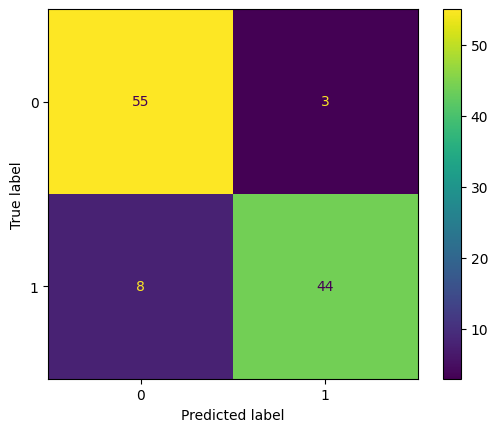

In [124]:
cm = confusion_matrix(y_validation, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= model.classes_)
disp.plot()
plt.show()

In [128]:
print(classification_report(y_validation, y_pred, target_names= ['Chết', 'Sống sót']))

              precision    recall  f1-score   support

        Chết       0.87      0.95      0.91        58
    Sống sót       0.94      0.85      0.89        52

    accuracy                           0.90       110
   macro avg       0.90      0.90      0.90       110
weighted avg       0.90      0.90      0.90       110



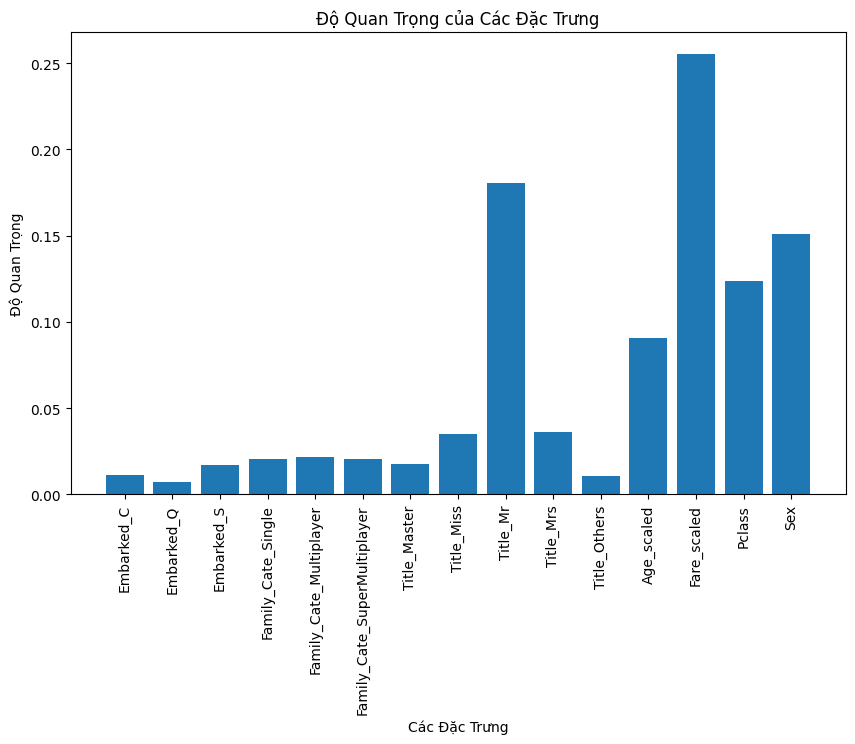

In [225]:
features_importances = list(model.feature_importances_)
feature_names = [f"{feature}" for feature in X.columns]

plt.figure(figsize=(10, 6))
plt.bar(feature_names, features_importances)
plt.xlabel('Các Đặc Trưng')
plt.ylabel('Độ Quan Trọng')
plt.title('Độ Quan Trọng của Các Đặc Trưng')
plt.xticks(rotation=90)
plt.show()

## Prediction

Data Pre-processing for Test dataset

In [136]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S


In [139]:
Show_missing(test_df, features_cols)

Cột Age có 20.57% giá trị bị thiếu. (86 mẫu)
Cột Fare có 0.24% giá trị bị thiếu. (1 mẫu)


In [140]:
test_df['Age'] = test_df.groupby(['Sex', 'Pclass'], group_keys= False)['Age'].apply(lambda x: x.fillna(x.median()))

In [148]:
Fare_by = test_df.groupby(['Pclass', 'Embarked']).median(numeric_only=True)['Fare']
Fare_by

Pclass  Embarked
1       C           75.24585
        Q           90.00000
        S           51.67085
2       C           15.04580
        Q           11.52915
        S           21.00000
3       C            7.22920
        Q            7.75000
        S            8.05000
Name: Fare, dtype: float64

In [149]:
test_df['Fare'] = test_df.groupby(['Pclass', 'Embarked'], group_keys= False)['Fare'].apply(lambda x: x.fillna(x.median()))

In [150]:
Show_missing(test_df, features_cols)

Dữ liệu đầy đủ


In [151]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Fare      418 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


In [152]:
test_df['Family'] = test_df['SibSp'].astype('int') + test_df['Parch'].astype('int') + 1
test_df['Family_Cate']= pd.cut(test_df['Family'], bins= [0, 1, 3, 11], labels = ['Single', 'Multiplayer', 'SuperMultiplayer'])

In [158]:
def extract_title(name):
  p = re.compile(r",([\w\s]+).")
  return p.search(name).groups(1)[0].strip()

test_df['Title'] = test_df['Name'].apply(lambda name: extract_title(name))

In [160]:
def group_title(title):
  if title in ['Mr', 'Mrs', 'Miss', 'Master']:
    return title
  elif title == 'Ms':
    return 'Miss'
  else:
    return 'Others'

test_df['Title'] = test_df['Title'].apply(lambda title: group_title(title))

In [161]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Pclass       418 non-null    int64   
 1   Name         418 non-null    object  
 2   Sex          418 non-null    object  
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    object  
 8   Family       418 non-null    int64   
 9   Family_Cate  418 non-null    category
 10  Title        418 non-null    object  
dtypes: category(1), float64(2), int64(4), object(4)
memory usage: 36.5+ KB


In [162]:
lab_Sex = LabelEncoder()
lab_Sex.fit(['female', 'male'])
test_df['Sex'] = lab_Sex.transform(test_df['Sex'])

In [163]:
Cate_features = ['Embarked', 'Family_Cate', 'Title']
test_df_Cate = test_df[Cate_features]
encoded_features = []

for feature in Cate_features:
  encoded_feature = pd.get_dummies(test_df[feature], prefix= feature)
  encoded_features.append(encoded_feature)

Cate_features_encoded = pd.concat([test_df_Cate] + encoded_features, axis=1)

In [171]:
Cate_features_encoded = Cate_features_encoded.drop(['Embarked', 'Family_Cate', 'Title'], axis= 1)

In [165]:
test_df['Age_scaled'] = age_scaler.transform(test_df[['Age']])
test_df['Fare_scaled'] = fare_scaler.transform(test_df[['Fare']])

In [167]:
selection_features = ['Age_scaled', 'Fare_scaled', 'Pclass', 'Sex']
test_data_preprocessed = test_df[selection_features]

In [168]:
test_data_preprocessed['Pclass'] = test_data_preprocessed['Pclass'].astype("int64")

<ipython-input-168-1c6dc87f061e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_preprocessed['Pclass'] = test_data_preprocessed['Pclass'].astype("int64")


In [172]:
best_test_data = pd.concat([Cate_features_encoded, test_data_preprocessed], axis= 1)

In [175]:
best_test_data.head()

,Embarked_C,Embarked_Q,Embarked_S,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Age_scaled,Fare_scaled,Pclass,Sex
PassengerId,,,,,,,,,,,,,,,
892,0,1,0,1,0,0,0,0,1,0,0,0.399451,-0.497079,3,1
893,0,0,1,0,1,0,0,0,0,1,0,1.359273,-0.511942,3,0
894,0,1,0,1,0,0,0,0,1,0,0,2.511059,-0.463770,2,1
895,0,0,1,1,0,0,0,0,1,0,0,-0.176442,-0.482143,3,1
896,0,0,1,0,1,0,0,0,0,1,0,-0.560371,-0.417167,3,0


In [176]:
best_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Embarked_C                    418 non-null    uint8  
 1   Embarked_Q                    418 non-null    uint8  
 2   Embarked_S                    418 non-null    uint8  
 3   Family_Cate_Single            418 non-null    uint8  
 4   Family_Cate_Multiplayer       418 non-null    uint8  
 5   Family_Cate_SuperMultiplayer  418 non-null    uint8  
 6   Title_Master                  418 non-null    uint8  
 7   Title_Miss                    418 non-null    uint8  
 8   Title_Mr                      418 non-null    uint8  
 9   Title_Mrs                     418 non-null    uint8  
 10  Title_Others                  418 non-null    uint8  
 11  Age_scaled                    418 non-null    float64
 12  Fare_scaled                   418 non-null    float64
 13  Pc

In [182]:
best_test_data.to_csv("/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Data/best_test_data.csv")

In [177]:
X_test = best_test_data.iloc[:] # Dependent Variables
X_test

,Embarked_C,Embarked_Q,Embarked_S,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Age_scaled,Fare_scaled,Pclass,Sex
PassengerId,,,,,,,,,,,,,,,
892,0,1,0,1,0,0,0,0,1,0,0,0.399451,-0.497079,3,1
893,0,0,1,0,1,0,0,0,0,1,0,1.359273,-0.511942,3,0
894,0,1,0,1,0,0,0,0,1,0,0,2.511059,-0.463770,2,1
895,0,0,1,1,0,0,0,0,1,0,0,-0.176442,-0.482143,3,1
896,0,0,1,0,1,0,0,0,0,1,0,-0.560371,-0.417167,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,0,0,1,1,0,0,0,0,1,0,0,-0.406799,-0.493121,3,1
1306,1,0,0,1,0,0,0,0,0,0,1,0.744987,1.314552,1,0
1307,0,0,1,1,0,0,0,0,1,0,0,0.706594,-0.507461,3,1


In [178]:
y_predict_test = model.predict(X_test)

In [180]:
output = pd.DataFrame({'PassengerId': X_test.index, 'Survived': y_predict_test})
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [195]:
gender_submission = pd.read_csv('/content/Dataset/gender_submission.csv')
Predicted_Comparation = pd.DataFrame({'PassengerId': best_test_data.index, 'Nhãn Dự Đoán': y_predict_test, 'Nhãn Thực Tế': gender_submission['Survived']})
Predicted_Comparation

,PassengerId,Nhãn Dự Đoán,Nhãn Thực Tế
0,892,0,0
1,893,0,1
2,894,0,0
3,895,0,0
4,896,1,1
...,...,...,...
413,1305,0,0
414,1306,1,1
415,1307,0,0
416,1308,0,0


In [197]:
Predicted_Comparation.to_csv("/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Data/Predicted_Comparation.csv")

In [196]:
unique_predictions = Predicted_Comparation['Nhãn Dự Đoán'].unique()

In [199]:
Comparation = Predicted_Comparation['Nhãn Dự Đoán'] != Predicted_Comparation['Nhãn Thực Tế']
count = Comparation.sum()

print("Số nhãn dự đoán sai ", count)
print("Các mẫu sai là:")
Predicted_Comparation[Comparation].head()

Số nhãn dự đoán sai  35
Các mẫu sai là:


,PassengerId,Nhãn Dự Đoán,Nhãn Thực Tế
1,893,0,1
21,913,1,0
64,956,1,0
75,967,1,0
80,972,1,0


In [216]:
Predicted_Comparation = pd.read_csv("/content/drive/MyDrive/ThiTieuLuan/Đồ án Chuyên Ngành Trí Tuệ Nhân Tạo/Data/Predicted_Comparation.csv", index_col= ["PassengerId"])

In [218]:
Predicted_Comparation = Predicted_Comparation.drop("Unnamed: 0", axis= 1)

In [219]:
new_test_df = pd.concat([test_df, Predicted_Comparation], axis =1)

In [220]:
example = new_test_df.loc[new_test_df.index == 893]
example

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Nhãn Dự Đoán,Nhãn Thực Tế
PassengerId,,,,,,,,,,,,
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0,NaN,S,0,1


Predict for new_input

In [474]:
# Dữ liệu là 3 hành khách mới
new_input = pd.DataFrame(
    {   "Title_Mr": [1, 1, 0],
        "Title_Mrs": [0, 0, 0],
        "Title_Miss": [0, 0, 1],
        "Title_Master": [0, 0, 0],
        "Title_Others": [0, 0, 0],
        "Sex" : ["male", "male", "female"], # Nam, Nam, Nữ
        "Pclass" : [3, 1, 1], # Dân thường, Dân giàu
        "Age" : [21, 21, 30], # 21 tuổi, 21, 30
        "Family_Cate_Single": [1, 0, 1],
        "Family_Cate_Multiplayer": [0, 1, 0],
        "Family_Cate_SuperMultiplayer": [0, 0, 0],
        "Fare" : [20, 50, 50], # 20$ cho tổng 1 vé, 50$
        "Embarked_Q" : [1, 0, 0],
        "Embarked_S" : [0, 1, 1],
        "Embarked_C" : [0, 0, 1]} # Cảng Q, Cảng S
)

new_input

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Others,Sex,Pclass,Age,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Fare,Embarked_Q,Embarked_S,Embarked_C
0,1,0,0,0,0,male,3,21,1,0,0,20,1,0,0
1,1,0,0,0,0,male,1,21,0,1,0,50,0,1,0
2,0,0,1,0,0,female,1,30,1,0,0,50,0,1,1


In [475]:
# Data Pre-processing
new_input['Age_scaled'] = age_scaler.transform(new_input[['Age']])
new_input['Fare_scaled'] = fare_scaler.transform(new_input[['Fare']])

new_input['Sex'] = lab_Sex.transform(new_input['Sex'])

In [476]:
new_input

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Others,Sex,Pclass,Age,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Fare,Embarked_Q,Embarked_S,Embarked_C,Age_scaled,Fare_scaled
0,1,0,0,0,0,1,3,21,1,0,0,20,1,0,0,-0.621193,-0.182259
1,1,0,0,0,0,1,1,21,0,1,0,50,0,1,0,-0.621193,1.403564
2,0,0,1,0,0,0,1,30,1,0,0,50,0,1,1,0.089548,1.403564


In [477]:
drop_features = ['Age', 'Fare']
new_input = new_input.drop(drop_features, axis= 1)
new_input

,Title_Mr,Title_Mrs,Title_Miss,Title_Master,Title_Others,Sex,Pclass,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Embarked_Q,Embarked_S,Embarked_C,Age_scaled,Fare_scaled
0,1,0,0,0,0,1,3,1,0,0,1,0,0,-0.621193,-0.182259
1,1,0,0,0,0,1,1,0,1,0,0,1,0,-0.621193,1.403564
2,0,0,1,0,0,0,1,1,0,0,0,1,1,0.089548,1.403564


In [478]:
X_test.columns, new_input.columns

(Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_Cate_Single',
        'Family_Cate_Multiplayer', 'Family_Cate_SuperMultiplayer',
        'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Others',
        'Age_scaled', 'Fare_scaled', 'Pclass', 'Sex'],
       dtype='object'),
 Index(['Title_Mr', 'Title_Mrs', 'Title_Miss', 'Title_Master', 'Title_Others',
        'Sex', 'Pclass', 'Family_Cate_Single', 'Family_Cate_Multiplayer',
        'Family_Cate_SuperMultiplayer', 'Embarked_Q', 'Embarked_S',
        'Embarked_C', 'Age_scaled', 'Fare_scaled'],
       dtype='object'))

In [479]:
new_input = new_input.reindex(columns= X_test.columns)

In [480]:
new_input

,Embarked_C,Embarked_Q,Embarked_S,Family_Cate_Single,Family_Cate_Multiplayer,Family_Cate_SuperMultiplayer,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others,Age_scaled,Fare_scaled,Pclass,Sex
0,0,1,0,1,0,0,0,0,1,0,0,-0.621193,-0.182259,3,1
1,0,0,1,0,1,0,0,0,1,0,0,-0.621193,1.403564,1,1
2,1,0,1,1,0,0,0,1,0,0,0,0.089548,1.403564,1,0


In [489]:
# Dự đoán
prediction = model.predict(new_input)
print(prediction)

# Lời Khuyên chân thành
for i in prediction:
  if i == 1:
    print(f"Đối với [{i}], nếu thảm họa nào đó xảy ra, có thể bạn sẽ có thể SỐNG SÓT một cách bình an. Have a nice day!")
  else:
    print(f"Đối với [{i}], tôi hi vọng bạn không nên đi chuyến đi này! Đây là lời khuyên chân thành nhất của một AI đối với bạn.")

[0 0 1]
Đối với [0], tôi hi vọng bạn không nên đi chuyến đi này! Đây là lời khuyên chân thành nhất của một AI đối với bạn.
Đối với [0], tôi hi vọng bạn không nên đi chuyến đi này! Đây là lời khuyên chân thành nhất của một AI đối với bạn.
Đối với [1], nếu thảm họa nào đó xảy ra, có thể bạn sẽ có thể SỐNG SÓT một cách bình an. Have a nice day!
